In [2]:
# The pip installation may be needed ONLY IF importing yfinance does not work
# In which case, do it before executing the import statement below.

# pip install yfinance

import yfinance as yf

In [3]:
import os

import pandas as pd

import numpy as np
import scipy as sci

# Block Chain Portfolio

## Load & Clean Raw Data

In [4]:
# get raw data on BKCH, an Block Chain ETF that tracks the NTTR, a 100 Technology Sector Return Index
# Data in spreadsheet downloaded from Global X, the manager of BKCH by Mirae Asset
os.chdir(r"/Users/caoweicheng/Desktop/UF Assignment/AI & ML/Project - Portfolio")
raw_BKCH = pd.read_csv("./BKCH.csv", skiprows=2) # Skip the fist 2 rows that are useless

print("Size of the dataset (row, col): ", raw_BKCH.shape)

raw_BKCH.head()

Size of the dataset (row, col):  (28, 7)


,% of Net Assets,Ticker,Name,SEDOL,Market Price ($),Shares Held,Market Value ($)
0,11.51,COIN,COINBASE GLOBA-A,BMC9P69,54.25,"141,963.00","7,701,492.75"
1,10.60,MARA,MARATHON DIGITAL,BLR7B52,9.36,"758,302.00","7,097,706.72"
2,9.56,HUT,HUT 8 MINING CORP,BF11385,2.05,"3,115,325.00","6,398,372.03"
3,9.51,RIOT,RIOT PLATFORMS INC,BD9F675,9.97,"638,430.00","6,365,147.10"
4,9.49,APLD,APPLIED DIGITAL CORP,BMCNFN8,9.44,"672,935.00","6,352,506.40"


In [5]:
# Delete the rows that have more than 1 NaN values
raw_BKCH = raw_BKCH.dropna(thresh=raw_BKCH.shape[1] - 1)

# Check the dataset
raw_BKCH

,% of Net Assets,Ticker,Name,SEDOL,Market Price ($),Shares Held,Market Value ($)
0,11.51,COIN,COINBASE GLOBA-A,BMC9P69,54.25,"141,963.00","7,701,492.75"
1,10.60,MARA,MARATHON DIGITAL,BLR7B52,9.36,"758,302.00","7,097,706.72"
2,9.56,HUT,HUT 8 MINING CORP,BF11385,2.05,"3,115,325.00","6,398,372.03"
3,9.51,RIOT,RIOT PLATFORMS INC,BD9F675,9.97,"638,430.00","6,365,147.10"
4,9.49,APLD,APPLIED DIGITAL CORP,BMCNFN8,9.44,"672,935.00","6,352,506.40"
5,6.39,BTBT,BIT DIGITAL INC,BMH6DN8,3.11,"1,374,172.00","4,273,674.92"
6,4.23,CLSK,CLEANSPARK INC,BJDRX78,3.87,"731,535.00","2,831,040.45"
7,4.13,BITF,BITFARMS LTD/CANADA,BGMG7B7,1.14,"2,424,714.00","2,764,615.20"
8,3.93,HIVE,HIVE BLOCKCHAIN,BPG8239,3.10,"849,299.00","2,629,309.40"
9,3.88,GLXY.TO,GALAXY DIGITAL HOLDINGS,BD5H1G9,3.35,"775,772.00","2,594,986.19"


In [6]:
# Get daily open/high/low/closing values for NTTR over the past 5 years
NTTR_values = yf.download('^NTTR',start='2018-06-13',end='2023-06-13')

[*********************100%***********************]  1 of 1 completed


In [7]:
NTTR_values

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-13,5047.040039,5078.509766,5022.830078,5032.779785,5032.779785,0
2018-06-14,5047.709961,5081.520020,5047.700195,5067.279785,5067.279785,0
2018-06-15,5034.140137,5056.009766,5005.600098,5054.950195,5054.950195,0
2018-06-18,5002.950195,5044.890137,4984.549805,5039.200195,5039.200195,0
2018-06-19,4961.299805,5001.620117,4934.520020,5000.370117,5000.370117,0
...,...,...,...,...,...,...
2023-06-06,9272.349609,9420.769531,9252.700195,9366.469727,9366.469727,0
2023-06-07,9409.120117,9431.690430,9155.209961,9175.919922,9175.919922,0
2023-06-08,9177.879883,9308.129883,9171.320312,9283.570312,9283.570312,0


In [8]:
# Get NTTR closing values
NTTR_close = NTTR_values[["Close"]]

NTTR_close

,Close
Date,
2018-06-13,5032.779785
2018-06-14,5067.279785
2018-06-15,5054.950195
2018-06-18,5039.200195
2018-06-19,5000.370117
...,...
2023-06-06,9366.469727
2023-06-07,9175.919922
2023-06-08,9283.570312


In [9]:
#  Stocks that form the NTTR
BKCH_tickers = raw_BKCH['Ticker']

print(raw_BKCH.columns)

Index(['% of Net Assets', 'Ticker', 'Name', 'SEDOL', 'Market Price ($)',
       'Shares Held', 'Market Value ($)'],
      dtype='object')


In [10]:
BKCH_tickers

0        COIN
1        MARA
2         HUT
3        RIOT
4        APLD
5        BTBT
6        CLSK
7        BITF
8        HIVE
9     GLXY.TO
10        CAN
11       CIFR
12       IREN
13       NVDA
14       BKKT
15         SQ
16       WULF
17       HOOD
18       PYPL
19       FOUR
20       ARBK
21     NB2.MU
22       OSTK
23       BIGG
25        SAI
Name: Ticker, dtype: object

In [11]:
# Check the correct name
ticker=BKCH_tickers[0]

In [12]:
ticker

'COIN'

In [13]:
# Therefore, the solution below removes such whitespace and prevents the issue 
# Create a list for all stocks
tickers=[]
for ticker in BKCH_tickers:
    tickers.append(ticker.strip())

## Download all 5-years price data for the ETFs

In [14]:
# get all the 5-year price data for the stocks in the IXIC
df_data_download = yf.download(tickers,start='2018-06-13',end='2023-06-13')

[*********************100%***********************]  25 of 25 completed


In [15]:
# Let's get a basic, global idea of the data
df_data_download.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2018-06-13 to 2023-06-12
Columns: 150 entries, ('Adj Close', 'APLD') to ('Volume', 'WULF')
dtypes: float64(150)
memory usage: 1.5 MB


In [16]:
# Let's now a look more closely
df_data_download

Adj Close                                                      \
                APLD  ARBK    BIGG  BITF  BKKT   BTBT   CAN  CIFR   CLSK   
Date                                                                       
2018-06-13       NaN   NaN  0.0035   NaN   NaN  6.599   NaN   NaN  19.50   
2018-06-14       NaN   NaN  0.0030   NaN   NaN  6.550   NaN   NaN  19.50   
2018-06-15       NaN   NaN  0.0035   NaN   NaN  7.399   NaN   NaN  19.50   
2018-06-18       NaN   NaN  0.0030   NaN   NaN  7.220   NaN   NaN  22.50   
2018-06-19       NaN   NaN  0.0034   NaN   NaN  7.063   NaN   NaN  22.50   
...              ...   ...     ...   ...   ...    ...   ...   ...    ...   
2023-06-06     9.690  1.27     NaN  1.17  1.40  2.980  1.93  2.38   4.10   
2023-06-07     8.840  1.20     NaN  1.12  1.39  2.820  1.93  2.33   3.91   
2023-06-08     9.270  1.22     NaN  1.13  1.43  2.960  2.04  2.29   3.90   
2023-06-09     7.995  1.16     NaN  1.09  1.39  2.860  2.12  2.30   3.80   
2023-06-12     8.685  1.18     NaN  1.17  1.36  2.950  2.24  2.42   3.76   

                       ...     Volume                                 \
                 COIN  ...       IREN        MARA NB2.MU        NVDA   
Date                   ...                                             
2018-06-13        NaN  ...        NaN    123000.0  102.0  33820800.0   
2018-06-14        NaN  ...        NaN    155775.0   20.0  43001600.0   
2018-06-15        NaN  ...        NaN    103900.0    0.0  43226000.0   
2018-06-18        NaN  ...        NaN     72125.0   22.0  35626800.0   
2018-06-19        NaN  ...        NaN     57575.0    0.0  59493200.0   
...               ...  ...        ...         ...    ...         ...   
2023-06-06  51.610001  ...  1063300.0  53229200.0    0.0  38872900.0   
2023-06-07  53.259998  ...  1049500.0  39054100.0  500.0  51199800.0   
2023-06-08  54.900002  ...   799900.0  19797200.0    0.0  41777200.0   
2023-06-09  53.279999  ...   632500.0  20506400.0   17.0  42722000.0   
2023-06-12  50.560001  ...   564000.0  14514900.0    NaN  38870100.0   

                                                                                
                 OSTK        PYPL        RIOT       SAI          SQ       WULF  
Date                                                                            
2018-06-13  1302400.0   7510300.0    232700.0       NaN  11262000.0     1300.0  
2018-06-14  2611400.0   6643400.0    283300.0       NaN  11913100.0      200.0  
2018-06-15  1351500.0   8710800.0    248200.0       NaN   7904400.0     6100.0  
2018-06-18  1467500.0   5579400.0    214100.0       NaN  10488300.0     4100.0  
2018-06-19  1105900.0   6245100.0    163400.0       NaN   9504500.0     6500.0  
...               ...         ...         ...       ...         ...        ...  
2023-06-06  2512000.0  13039200.0  26503000.0  372400.0  10479600.0  2389900.0  
2023-06-07  1264400.0  15511900.0  19520700.0  134700.0   9270900.0  1658500.0  
2023-06-08   838100.0  13568500.0  11197900.0  168000.0   8673000.0  1075700.0  
2023-06-09  1064900.0  17140800.0   9124500.0  163600.0   6558200.0  1969500.0  
2023-06-12   900500.0  15945400.0  10136600.0  113700.0   6165600.0  1545900.0  

[1292 rows x 150 columns]

In [17]:
# Check all col name, and delete the col that we dont need
print(df_data_download.columns)

MultiIndex([('Adj Close',   'APLD'),
            ('Adj Close',   'ARBK'),
            ('Adj Close',   'BIGG'),
            ('Adj Close',   'BITF'),
            ('Adj Close',   'BKKT'),
            ('Adj Close',   'BTBT'),
            ('Adj Close',    'CAN'),
            ('Adj Close',   'CIFR'),
            ('Adj Close',   'CLSK'),
            ('Adj Close',   'COIN'),
            ...
            (   'Volume',   'IREN'),
            (   'Volume',   'MARA'),
            (   'Volume', 'NB2.MU'),
            (   'Volume',   'NVDA'),
            (   'Volume',   'OSTK'),
            (   'Volume',   'PYPL'),
            (   'Volume',   'RIOT'),
            (   'Volume',    'SAI'),
            (   'Volume',     'SQ'),
            (   'Volume',   'WULF')],
           length=150)


In [18]:
# Notice below that we have gone from 150 columns to 25 (exactly the number of stocks in NTTR)
df_data_download 

Adj Close                                                      \
                APLD  ARBK    BIGG  BITF  BKKT   BTBT   CAN  CIFR   CLSK   
Date                                                                       
2018-06-13       NaN   NaN  0.0035   NaN   NaN  6.599   NaN   NaN  19.50   
2018-06-14       NaN   NaN  0.0030   NaN   NaN  6.550   NaN   NaN  19.50   
2018-06-15       NaN   NaN  0.0035   NaN   NaN  7.399   NaN   NaN  19.50   
2018-06-18       NaN   NaN  0.0030   NaN   NaN  7.220   NaN   NaN  22.50   
2018-06-19       NaN   NaN  0.0034   NaN   NaN  7.063   NaN   NaN  22.50   
...              ...   ...     ...   ...   ...    ...   ...   ...    ...   
2023-06-06     9.690  1.27     NaN  1.17  1.40  2.980  1.93  2.38   4.10   
2023-06-07     8.840  1.20     NaN  1.12  1.39  2.820  1.93  2.33   3.91   
2023-06-08     9.270  1.22     NaN  1.13  1.43  2.960  2.04  2.29   3.90   
2023-06-09     7.995  1.16     NaN  1.09  1.39  2.860  2.12  2.30   3.80   
2023-06-12     8.685  1.18     NaN  1.17  1.36  2.950  2.24  2.42   3.76   

                       ...     Volume                                 \
                 COIN  ...       IREN        MARA NB2.MU        NVDA   
Date                   ...                                             
2018-06-13        NaN  ...        NaN    123000.0  102.0  33820800.0   
2018-06-14        NaN  ...        NaN    155775.0   20.0  43001600.0   
2018-06-15        NaN  ...        NaN    103900.0    0.0  43226000.0   
2018-06-18        NaN  ...        NaN     72125.0   22.0  35626800.0   
2018-06-19        NaN  ...        NaN     57575.0    0.0  59493200.0   
...               ...  ...        ...         ...    ...         ...   
2023-06-06  51.610001  ...  1063300.0  53229200.0    0.0  38872900.0   
2023-06-07  53.259998  ...  1049500.0  39054100.0  500.0  51199800.0   
2023-06-08  54.900002  ...   799900.0  19797200.0    0.0  41777200.0   
2023-06-09  53.279999  ...   632500.0  20506400.0   17.0  42722000.0   
2023-06-12  50.560001  ...   564000.0  14514900.0    NaN  38870100.0   

                                                                                
                 OSTK        PYPL        RIOT       SAI          SQ       WULF  
Date                                                                            
2018-06-13  1302400.0   7510300.0    232700.0       NaN  11262000.0     1300.0  
2018-06-14  2611400.0   6643400.0    283300.0       NaN  11913100.0      200.0  
2018-06-15  1351500.0   8710800.0    248200.0       NaN   7904400.0     6100.0  
2018-06-18  1467500.0   5579400.0    214100.0       NaN  10488300.0     4100.0  
2018-06-19  1105900.0   6245100.0    163400.0       NaN   9504500.0     6500.0  
...               ...         ...         ...       ...         ...        ...  
2023-06-06  2512000.0  13039200.0  26503000.0  372400.0  10479600.0  2389900.0  
2023-06-07  1264400.0  15511900.0  19520700.0  134700.0   9270900.0  1658500.0  
2023-06-08   838100.0  13568500.0  11197900.0  168000.0   8673000.0  1075700.0  
2023-06-09  1064900.0  17140800.0   9124500.0  163600.0   6558200.0  1969500.0  
2023-06-12   900500.0  15945400.0  10136600.0  113700.0   6165600.0  1545900.0  

[1292 rows x 150 columns]

In [19]:
# Notice the 'Adj Close' in the column header, making it multiindex, and to keep matters simple and
# helpful, we should eliminate this additional index. To do so, first relabel it so that we can use
# it to redefine a new dataframe
df_data_download.rename(columns={'Adj Close':'adj_close'}, inplace=True)


In [20]:
# Let's check the dataframe
df_data_download

adj_close                                                      \
                APLD  ARBK    BIGG  BITF  BKKT   BTBT   CAN  CIFR   CLSK   
Date                                                                       
2018-06-13       NaN   NaN  0.0035   NaN   NaN  6.599   NaN   NaN  19.50   
2018-06-14       NaN   NaN  0.0030   NaN   NaN  6.550   NaN   NaN  19.50   
2018-06-15       NaN   NaN  0.0035   NaN   NaN  7.399   NaN   NaN  19.50   
2018-06-18       NaN   NaN  0.0030   NaN   NaN  7.220   NaN   NaN  22.50   
2018-06-19       NaN   NaN  0.0034   NaN   NaN  7.063   NaN   NaN  22.50   
...              ...   ...     ...   ...   ...    ...   ...   ...    ...   
2023-06-06     9.690  1.27     NaN  1.17  1.40  2.980  1.93  2.38   4.10   
2023-06-07     8.840  1.20     NaN  1.12  1.39  2.820  1.93  2.33   3.91   
2023-06-08     9.270  1.22     NaN  1.13  1.43  2.960  2.04  2.29   3.90   
2023-06-09     7.995  1.16     NaN  1.09  1.39  2.860  2.12  2.30   3.80   
2023-06-12     8.685  1.18     NaN  1.17  1.36  2.950  2.24  2.42   3.76   

                       ...     Volume                                 \
                 COIN  ...       IREN        MARA NB2.MU        NVDA   
Date                   ...                                             
2018-06-13        NaN  ...        NaN    123000.0  102.0  33820800.0   
2018-06-14        NaN  ...        NaN    155775.0   20.0  43001600.0   
2018-06-15        NaN  ...        NaN    103900.0    0.0  43226000.0   
2018-06-18        NaN  ...        NaN     72125.0   22.0  35626800.0   
2018-06-19        NaN  ...        NaN     57575.0    0.0  59493200.0   
...               ...  ...        ...         ...    ...         ...   
2023-06-06  51.610001  ...  1063300.0  53229200.0    0.0  38872900.0   
2023-06-07  53.259998  ...  1049500.0  39054100.0  500.0  51199800.0   
2023-06-08  54.900002  ...   799900.0  19797200.0    0.0  41777200.0   
2023-06-09  53.279999  ...   632500.0  20506400.0   17.0  42722000.0   
2023-06-12  50.560001  ...   564000.0  14514900.0    NaN  38870100.0   

                                                                                
                 OSTK        PYPL        RIOT       SAI          SQ       WULF  
Date                                                                            
2018-06-13  1302400.0   7510300.0    232700.0       NaN  11262000.0     1300.0  
2018-06-14  2611400.0   6643400.0    283300.0       NaN  11913100.0      200.0  
2018-06-15  1351500.0   8710800.0    248200.0       NaN   7904400.0     6100.0  
2018-06-18  1467500.0   5579400.0    214100.0       NaN  10488300.0     4100.0  
2018-06-19  1105900.0   6245100.0    163400.0       NaN   9504500.0     6500.0  
...               ...         ...         ...       ...         ...        ...  
2023-06-06  2512000.0  13039200.0  26503000.0  372400.0  10479600.0  2389900.0  
2023-06-07  1264400.0  15511900.0  19520700.0  134700.0   9270900.0  1658500.0  
2023-06-08   838100.0  13568500.0  11197900.0  168000.0   8673000.0  1075700.0  
2023-06-09  1064900.0  17140800.0   9124500.0  163600.0   6558200.0  1969500.0  
2023-06-12   900500.0  15945400.0  10136600.0  113700.0   6165600.0  1545900.0  

[1292 rows x 150 columns]

## Create a df for log returns rate

In [21]:
# We can now define a new dataframe with just a single index column name

df_returns = df_data_download.adj_close

In [22]:
# Check the df
df_returns 

,APLD,ARBK,BIGG,BITF,BKKT,BTBT,CAN,CIFR,CLSK,COIN,...,IREN,MARA,NB2.MU,NVDA,OSTK,PYPL,RIOT,SAI,SQ,WULF
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,NaN,NaN,0.0035,NaN,NaN,6.599,NaN,NaN,19.50,NaN,...,NaN,4.72,19.500000,65.000900,38.200001,85.269997,7.26,NaN,62.500000,8.993953
2018-06-14,NaN,NaN,0.0030,NaN,NaN,6.550,NaN,NaN,19.50,NaN,...,NaN,4.84,18.500000,66.118118,39.450001,85.610001,7.54,NaN,63.880001,9.283805
2018-06-15,NaN,NaN,0.0035,NaN,NaN,7.399,NaN,NaN,19.50,NaN,...,NaN,4.84,18.400000,65.709381,38.900002,85.309998,7.40,NaN,64.480003,9.283805
2018-06-18,NaN,NaN,0.0030,NaN,NaN,7.220,NaN,NaN,22.50,NaN,...,NaN,4.76,24.900000,65.667267,39.500000,85.849998,7.38,NaN,66.199997,9.249705
2018-06-19,NaN,NaN,0.0034,NaN,NaN,7.063,NaN,NaN,22.50,NaN,...,NaN,4.68,24.900000,64.448509,38.750000,84.519997,7.32,NaN,65.959999,8.891652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,9.690,1.27,NaN,1.17,1.40,2.980,1.93,2.38,4.10,51.610001,...,3.42,10.08,19.020000,386.500000,21.540001,65.019997,10.90,1.49,65.980003,1.490000
2023-06-07,8.840,1.20,NaN,1.12,1.39,2.820,1.93,2.33,3.91,53.259998,...,3.40,9.55,18.700001,374.750000,21.500000,64.040001,10.43,1.47,66.239998,1.430000
2023-06-08,9.270,1.22,NaN,1.13,1.43,2.960,2.04,2.29,3.90,54.900002,...,3.57,9.57,19.400000,385.100006,21.840000,64.239998,10.55,1.42,65.089996,1.430000


In [23]:
#  We are now in position to compute the log returns 
#  To simplify the typing below, lets rename the dataframe for our returns
df2 = df_returns

In [24]:
# Compute the log returns and replace the columns entries, which previously were closing prices,
# with the log-returns (and relabel the columns as well)
for i in range(len(df2.columns)):
    df2.loc[:,df2.columns[i]]=np.log(df2.loc[:,df2.columns[i]]/df2.loc[:,df2.columns[i]].shift(1))
    df2.rename(columns={df2.columns[i]:df2.columns[i]+' log retn'}, inplace=True)

/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_17979/634895821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,df2.columns[i]]=np.log(df2.loc[:,df2.columns[i]]/df2.loc[:,df2.columns[i]].shift(1))
/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_17979/634895821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={df2.columns[i]:df2.columns[i]+' log retn'}, inplace=True)
/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_17979/634895821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [25]:
# let's take a look at the returns just computed
df2

,APLD log retn,ARBK log retn,BIGG log retn,BITF log retn,BKKT log retn,BTBT log retn,CAN log retn,CIFR log retn,CLSK log retn,COIN log retn,...,IREN log retn,MARA log retn,NB2.MU log retn,NVDA log retn,OSTK log retn,PYPL log retn,RIOT log retn,SAI log retn,SQ log retn,WULF log retn
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-14,NaN,NaN,-0.154151,NaN,NaN,-0.007453,NaN,NaN,0.000000,NaN,...,NaN,0.025106,-0.052644,0.017042,0.032199,0.003979,0.037842,NaN,0.021840,0.031719
2018-06-15,NaN,NaN,0.154151,NaN,NaN,0.121880,NaN,NaN,0.000000,NaN,...,NaN,0.000000,-0.005420,-0.006201,-0.014040,-0.003510,-0.018742,NaN,0.009349,0.000000
2018-06-18,NaN,NaN,-0.154151,NaN,NaN,-0.024490,NaN,NaN,0.143101,NaN,...,NaN,-0.016667,0.302517,-0.000641,0.015306,0.006310,-0.002706,NaN,0.026325,-0.003680
2018-06-19,NaN,NaN,0.125163,NaN,NaN,-0.021985,NaN,NaN,0.000000,NaN,...,NaN,-0.016950,0.000000,-0.018734,-0.019170,-0.015613,-0.008163,NaN,-0.003632,-0.039479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,0.035718,0.032003,NaN,0.043675,0.000000,0.069472,0.010417,0.012685,0.044895,-0.128895,...,0.079069,0.092437,-0.040191,-0.013286,0.109807,0.007875,0.020390,0.083965,0.037682,0.041102
2023-06-07,-0.091807,-0.056695,NaN,-0.043675,-0.007168,-0.055186,0.000000,-0.021232,-0.047450,0.031470,...,-0.005865,-0.054012,-0.016968,-0.030873,-0.001859,-0.015187,-0.044076,-0.013514,0.003933,-0.041102
2023-06-08,0.047497,0.016529,NaN,0.008889,0.028371,0.048452,0.055430,-0.017316,-0.002561,0.030328,...,0.048790,0.002092,0.036749,0.027244,0.015690,0.003118,0.011440,-0.034606,-0.017514,0.000000


# Autoencoder Model
## Part 1: 
##   Find the "most communal" and "least communal stocks"

In [26]:
# NOTE: We could have imported the libraries in this cell in the first (or second) one above

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras

from numpy.random import seed
from sklearn.metrics import mean_squared_error

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Divide data into train, val and test set for the ETFs

In [27]:
# Divide data into training set and test set
train,test=train_test_split(df2,test_size=0.2,random_state=100)

# Divide training set into training and validation set
train,validation=train_test_split(train,test_size=0.25,random_state=100)

In [28]:
# Check the size of the data for the NN modeling 
print("train:",train.shape)
print("validation:",validation.shape)
print("test:",test.shape)

train: (774, 25)
validation: (259, 25)
test: (259, 25)


In [29]:
num_stocks = len(df2.columns)
num_stocks

25

## Create Autoencoder Model

In [31]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_17979/3686478097.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [33]:
# Create Autoencoder Model

# Here we create a model for each stock and, for each, save the resulting MSE
# We then rank teh stocks on the basis of the MSE

model=list(range(num_stocks))
mse_test=[]

for i in range (num_stocks):
    x_train=train.iloc[:,i].dropna()
    y_train=x_train
    x_val=validation.iloc[:,i].dropna()
    y_val=x_val
    x_test=test.iloc[:,i].dropna()
    y_test=x_test
    
    model[i] = keras.models.Sequential([Dense(20,activation = "relu",input_shape = (1,)),
                                 Dense(5,activation = "relu"),
                                 Dense(20,activation = "relu"),
                                 Dense(1,activation = "sigmoid")])
    
    model[i].compile(loss = "mse",optimizer = "Adam")

    history=model[i].fit(x_train,y_train,
                      epochs=100, 
                      batch_size = 128, 
                      validation_data= (x_val,y_val),
                      verbose = 0)
    
 # Calcuate  and save MSE for testing set   
    mse_test.append(model[i].evaluate(x_test,y_test,verbose=0))


In [31]:
# Here we list the stock in increasing order of MSE
print("stock #  |   mse   |      stock name")
ranking = np.array(mse_test).argsort()
for stock_index in ranking:
    print(stock_index, mse_test[stock_index], df2.iloc[:,stock_index].name) 

stock #  |   mse   |      stock name
18 0.0010258335387334228 NVDA log retn
20 0.0011695177527144551 PYPL log retn
23 0.001351240323856473 SQ log retn
17 0.0014229167718440294 NB2.MU log retn
10 0.0014661172172054648 FOUR log retn
24 0.0016687848838046193 WULF log retn
19 0.0026830779388546944 OSTK log retn
5 0.002854477846994996 BTBT log retn
13 0.0029440412763506174 HOOD log retn
6 0.0029628274496644735 CAN log retn
14 0.003046079771593213 HUT log retn
21 0.003101583570241928 RIOT log retn
12 0.0034456620924174786 HIVE log retn
7 0.003572209272533655 CIFR log retn
3 0.0038715065456926823 BITF log retn
16 0.003957655746489763 MARA log retn
22 0.004128970671445131 SAI log retn
4 0.004501483868807554 BKKT log retn
11 0.004577052313834429 GLXY.TO log retn
8 0.0048568821512162685 CLSK log retn
9 0.0051140571013092995 COIN log retn
15 0.007872030138969421 IREN log retn
0 0.008352288976311684 APLD log retn
1 0.013077333569526672 ARBK log retn
2 0.415123850107193 BIGG log retn


# Part 2:
## Build a tracking portfolio based on
### the 10 "most communal" and 
### the 5 "least communal stocks"

In [32]:
#Select 10 most communal and 5 least communal stocks
non_communal= 5 # Last

# In this case we have a total of s stocks, where
s = 10 + non_communal  # First

stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:])) # Ranking
stock_index

array([18, 20, 23, 17, 10, 24, 19,  5, 13,  6,  9, 15,  0,  1,  2])

In [33]:
#Portfolio with 15 stocks
port15 = df2.iloc[:, stock_index]
port15=port15.fillna(0)
port15

,NVDA log retn,PYPL log retn,SQ log retn,NB2.MU log retn,FOUR log retn,WULF log retn,OSTK log retn,BTBT log retn,HOOD log retn,CAN log retn,COIN log retn,IREN log retn,APLD log retn,ARBK log retn,BIGG log retn
Date,,,,,,,,,,,,,,,
2018-06-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-14,0.017042,0.003979,0.021840,-0.052644,0.000000,0.031719,0.032199,-0.007453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.154151
2018-06-15,-0.006201,-0.003510,0.009349,-0.005420,0.000000,0.000000,-0.014040,0.121880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151
2018-06-18,-0.000641,0.006310,0.026325,0.302517,0.000000,-0.003680,0.015306,-0.024490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.154151
2018-06-19,-0.018734,-0.015613,-0.003632,0.000000,0.000000,-0.039479,-0.019170,-0.021985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,-0.013286,0.007875,0.037682,-0.040191,0.016527,0.041102,0.109807,0.069472,0.009917,0.010417,-0.128895,0.079069,0.035718,0.032003,0.000000
2023-06-07,-0.030873,-0.015187,0.003933,-0.016968,0.005202,-0.041102,-0.001859,-0.055186,0.030240,0.000000,0.031470,-0.005865,-0.091807,-0.056695,0.000000
2023-06-08,0.027244,0.003118,-0.017514,0.036749,-0.010730,0.000000,0.015690,0.048452,0.010582,0.055430,0.030328,0.048790,0.047497,0.016529,0.000000


## Calculate index log return for the Index

In [34]:
#Calculate index log return
idx_ret=np.log(NTTR_close.pct_change()+1) # the rate of index returns
idx_ret=idx_ret.fillna(0)
idx_ret

,Close
Date,
2018-06-13,0.000000
2018-06-14,0.006832
2018-06-15,-0.002436
2018-06-18,-0.003121
2018-06-19,-0.007735
...,...
2023-06-06,0.007103
2023-06-07,-0.020554
2023-06-08,0.011664


In [35]:
# The rows of index not equal to portfolio's

# Get the indices from idx_ret
idx_ret_indices = idx_ret.index

# Select only the rows of port13 that are in idx_ret_indices
port15 = port15.loc[idx_ret_indices]

# Check the portfolio data rows again
port15

,NVDA log retn,PYPL log retn,SQ log retn,NB2.MU log retn,FOUR log retn,WULF log retn,OSTK log retn,BTBT log retn,HOOD log retn,CAN log retn,COIN log retn,IREN log retn,APLD log retn,ARBK log retn,BIGG log retn
Date,,,,,,,,,,,,,,,
2018-06-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-14,0.017042,0.003979,0.021840,-0.052644,0.000000,0.031719,0.032199,-0.007453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.154151
2018-06-15,-0.006201,-0.003510,0.009349,-0.005420,0.000000,0.000000,-0.014040,0.121880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151
2018-06-18,-0.000641,0.006310,0.026325,0.302517,0.000000,-0.003680,0.015306,-0.024490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.154151
2018-06-19,-0.018734,-0.015613,-0.003632,0.000000,0.000000,-0.039479,-0.019170,-0.021985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,-0.013286,0.007875,0.037682,-0.040191,0.016527,0.041102,0.109807,0.069472,0.009917,0.010417,-0.128895,0.079069,0.035718,0.032003,0.000000
2023-06-07,-0.030873,-0.015187,0.003933,-0.016968,0.005202,-0.041102,-0.001859,-0.055186,0.030240,0.000000,0.031470,-0.005865,-0.091807,-0.056695,0.000000
2023-06-08,0.027244,0.003118,-0.017514,0.036749,-0.010730,0.000000,0.015690,0.048452,0.010582,0.055430,0.030328,0.048790,0.047497,0.016529,0.000000


## Divide index data to train, val and test set for portfolio & index

In [36]:
# Divide data into training set and test set
X_train1,X_test1,Y_train1,Y_test1=train_test_split(port15,idx_ret,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train1,X_val1,Y_train1,Y_val1=train_test_split(X_train1,Y_train1,test_size=0.25,random_state=100)

## Create NN Index-Tracking Model 1

In [37]:
# Create NN Index-Tracking Model 1
model1 = keras.models.Sequential([Dense(10,activation = "relu",input_shape = (15,)), # It's 15 features for Model 1
                                 Dense(10,activation = "relu"),
                                 Dense(15,activation = "softmax")]) # 15 of outputs

model1.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 10)                160       
                                                                 
 dense_101 (Dense)           (None, 10)                110       
                                                                 
 dense_102 (Dense)           (None, 15)                165       
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


### Define a loss function for tracking

In [38]:
# Define a loss function to capture the (Euclidean) distance between the index performance and that 
# of the tracking portfolio above 

def custom_loss_function (x_values, y_values):
      squared_difference = tf.square(x_values-y_values) 
      return tf.reduce_mean(squared_difference, axis=-1) 

### Compile NN Model 1

In [39]:
#Compile NN Model 1
model1.compile(loss = custom_loss_function, optimizer = "Adam")

In [40]:
# Run Model 1 and collect performance in history 1
history1 = model1.fit(X_train1, Y_train1,
                     epochs=100, 
                     batch_size = 128, 
                     validation_data=(X_val1,Y_val1),
                     verbose = 1)

Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 11/100
6/6 [==========

In [41]:
#Get weights for stocks in the portfolio
weights1 = model1.predict(X_test1)
weights1 = weights1[0]
weights1

8/8 [==============================] - 0s 930us/step


array([0.06667124, 0.06665741, 0.06667309, 0.06665179, 0.06666347,
       0.06667113, 0.06667676, 0.06665856, 0.06666341, 0.06666882,
       0.06667573, 0.0666688 , 0.06666393, 0.06667516, 0.06666072],
      dtype=float32)

In [42]:
#Calculate portfolio returns
port_ret1 = np.dot(port15,weights1)
port_ret1

array([ 0.        , -0.0071622 ,  0.01707863, ...,  0.02081077,
       -0.02533421,  0.00675023])

In [43]:
#Compare portfolio returns with 15 stocks with index returns
cl1 = custom_loss_function(np.array(port_ret1), np.array(idx_ret))
cl1.numpy()

array([0.00069328, 0.00074719, 0.00069664, ..., 0.00084168, 0.00070283,
       0.00145307])

In [44]:
# Mean error (loss) between index returns and index-tracking portfolio with a total of S = 25 stocks selected above
mean_loss1=np.mean(cl1)
mean_loss1

0.0010993935828277647

# Part 2:
## Build a tracking portfolio based on 
### the 10 "most communal" and 
### the 15 "least communal stocks

In [45]:
#Select 10 most communal and 15 least communal stocks
non_communal= 15 # Last

# In this case we have a total of s stocks, where
s = 10 + non_communal  # First

stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:])) # Ranking
stock_index

array([18, 20, 23, 17, 10, 24, 19,  5, 13,  6, 14, 21, 12,  7,  3, 16, 22,
        4, 11,  8,  9, 15,  0,  1,  2])

In [46]:
#Portfolio with 25 stocks
port25 = df2.iloc[:, stock_index]
port25=port25.fillna(0)
port25

,NVDA log retn,PYPL log retn,SQ log retn,NB2.MU log retn,FOUR log retn,WULF log retn,OSTK log retn,BTBT log retn,HOOD log retn,CAN log retn,...,MARA log retn,SAI log retn,BKKT log retn,GLXY.TO log retn,CLSK log retn,COIN log retn,IREN log retn,APLD log retn,ARBK log retn,BIGG log retn
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-14,0.017042,0.003979,0.021840,-0.052644,0.000000,0.031719,0.032199,-0.007453,0.000000,0.000000,...,0.025106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.154151
2018-06-15,-0.006201,-0.003510,0.009349,-0.005420,0.000000,0.000000,-0.014040,0.121880,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151
2018-06-18,-0.000641,0.006310,0.026325,0.302517,0.000000,-0.003680,0.015306,-0.024490,0.000000,0.000000,...,-0.016667,0.000000,0.000000,0.000000,0.143101,0.000000,0.000000,0.000000,0.000000,-0.154151
2018-06-19,-0.018734,-0.015613,-0.003632,0.000000,0.000000,-0.039479,-0.019170,-0.021985,0.000000,0.000000,...,-0.016950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,-0.013286,0.007875,0.037682,-0.040191,0.016527,0.041102,0.109807,0.069472,0.009917,0.010417,...,0.092437,0.083965,0.000000,-0.039221,0.044895,-0.128895,0.079069,0.035718,0.032003,0.000000
2023-06-07,-0.030873,-0.015187,0.003933,-0.016968,0.005202,-0.041102,-0.001859,-0.055186,0.030240,0.000000,...,-0.054012,-0.013514,-0.007168,-0.061875,-0.047450,0.031470,-0.005865,-0.091807,-0.056695,0.000000
2023-06-08,0.027244,0.003118,-0.017514,0.036749,-0.010730,0.000000,0.015690,0.048452,0.010582,0.055430,...,0.002092,-0.034606,0.028371,-0.004264,-0.002561,0.030328,0.048790,0.047497,0.016529,0.000000


## Divide data into train, val and test for model 2

In [48]:
# The rows of index not equal to portfolio's

# Get the indices from idx_ret
idx_ret_indices = idx_ret.index

# Select only the rows of port13 that are in idx_ret_indices
port25 = port25.loc[idx_ret_indices]

# Check the portfolio data rows again
port25

,NVDA log retn,PYPL log retn,SQ log retn,NB2.MU log retn,FOUR log retn,WULF log retn,OSTK log retn,BTBT log retn,HOOD log retn,CAN log retn,...,MARA log retn,SAI log retn,BKKT log retn,GLXY.TO log retn,CLSK log retn,COIN log retn,IREN log retn,APLD log retn,ARBK log retn,BIGG log retn
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-14,0.017042,0.003979,0.021840,-0.052644,0.000000,0.031719,0.032199,-0.007453,0.000000,0.000000,...,0.025106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.154151
2018-06-15,-0.006201,-0.003510,0.009349,-0.005420,0.000000,0.000000,-0.014040,0.121880,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151
2018-06-18,-0.000641,0.006310,0.026325,0.302517,0.000000,-0.003680,0.015306,-0.024490,0.000000,0.000000,...,-0.016667,0.000000,0.000000,0.000000,0.143101,0.000000,0.000000,0.000000,0.000000,-0.154151
2018-06-19,-0.018734,-0.015613,-0.003632,0.000000,0.000000,-0.039479,-0.019170,-0.021985,0.000000,0.000000,...,-0.016950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,-0.013286,0.007875,0.037682,-0.040191,0.016527,0.041102,0.109807,0.069472,0.009917,0.010417,...,0.092437,0.083965,0.000000,-0.039221,0.044895,-0.128895,0.079069,0.035718,0.032003,0.000000
2023-06-07,-0.030873,-0.015187,0.003933,-0.016968,0.005202,-0.041102,-0.001859,-0.055186,0.030240,0.000000,...,-0.054012,-0.013514,-0.007168,-0.061875,-0.047450,0.031470,-0.005865,-0.091807,-0.056695,0.000000
2023-06-08,0.027244,0.003118,-0.017514,0.036749,-0.010730,0.000000,0.015690,0.048452,0.010582,0.055430,...,0.002092,-0.034606,0.028371,-0.004264,-0.002561,0.030328,0.048790,0.047497,0.016529,0.000000


In [49]:
# Divide data into training set and test set
X_train2,X_test2,Y_train2,Y_test2=train_test_split(port25,idx_ret,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train2,X_val2,Y_train2,Y_val2=train_test_split(X_train2,Y_train2,test_size=0.25,random_state=100)

## Create NN Index-Tracking Model 2

In [50]:
# Create NN Index-Tracking Model 2
model2 = keras.models.Sequential([Dense(10,activation = "relu",input_shape = (25,)), # It's 25 features for Model 1
                                 Dense(10,activation = "relu"),
                                 Dense(25,activation = "softmax")]) # 25 of outputs

model2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 10)                260       
                                                                 
 dense_104 (Dense)           (None, 10)                110       
                                                                 
 dense_105 (Dense)           (None, 25)                275       
                                                                 
Total params: 645
Trainable params: 645
Non-trainable params: 0
_________________________________________________________________


### Define a loss function for tracking

In [51]:
# Define a loss function to capture the (Euclidean) distance between the index performance and that 
# of the tracking portfolio above 

def custom_loss_function (x_values, y_values):
      squared_difference = tf.square(x_values-y_values) 
      return tf.reduce_mean(squared_difference, axis=-1) 

### Compile NN Model 2

In [52]:
# Compile NN Model 2
model2.compile(loss = custom_loss_function, optimizer = "Adam")

In [53]:
# Run Model 2 and collect performance in history 2
history2 = model2.fit(X_train2, Y_train2,
                     epochs=100, 
                     batch_size = 128, 
                     validation_data=(X_val2,Y_val2),
                     verbose = 1)

Epoch 1/100
6/6 [==============================] - 1s 27ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 11/100
6/6 [==========

In [54]:
#Get weights for stocks in the portfolio
weights2 = model2.predict(X_test2)
weights2 = weights2[0]
weights2

8/8 [==============================] - 0s 1ms/step


array([0.04000109, 0.04000143, 0.03999877, 0.03999988, 0.03999865,
       0.03999808, 0.03999915, 0.04000329, 0.04000765, 0.03999725,
       0.03999392, 0.04000307, 0.04000644, 0.03999846, 0.03999465,
       0.03999849, 0.04000552, 0.03999441, 0.03999915, 0.04000171,
       0.03999764, 0.03999895, 0.03999788, 0.04000472, 0.03999979],
      dtype=float32)

In [55]:
#Calculate 25 stocks of portfolio returns
port_ret2 = np.dot(port25,weights2)
port_ret2

array([ 0.        , -0.00134726,  0.00841761, ...,  0.01183399,
       -0.02451567,  0.01166353])

In [56]:
#Compare portfolio returns with 15 stocks with index returns
cl2 = custom_loss_function(np.array(port_ret2), np.array(idx_ret))
cl2.numpy()

array([0.0008868 , 0.00094001, 0.00089041, ..., 0.001034  , 0.00089608,
       0.0016438 ])

In [57]:
# Mean error (loss) between index returns and index-tracking portfolio with a total of S = 25 stocks selected above
mean_loss2=np.mean(cl2)
mean_loss2

0.0012928603980342233

# Plot the returns of the index versus block chain portfolios identified above

## Plot the returns of the index versus portfolio 1

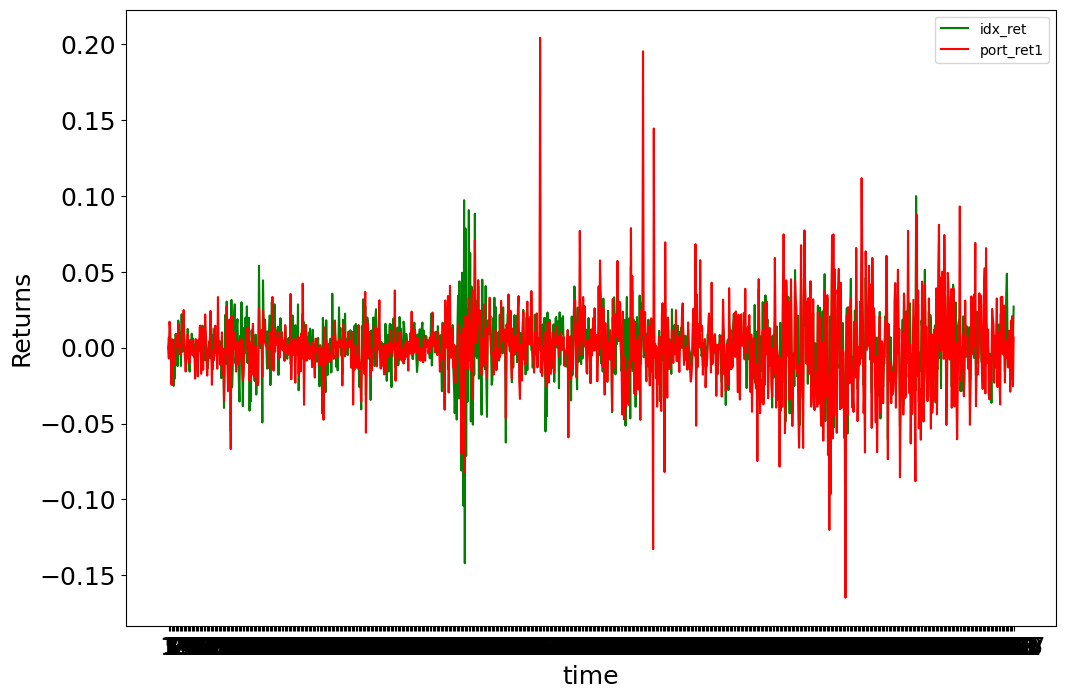

In [58]:
# Plot the returns of the index versus portfolio 1
# Number of time observations is:
numobs = len(NTTR_values) # index NTTR

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [12,8] 
plt.plot(range(0,numobs),idx_ret,color='green', label='idx_ret') # Green is index returns
plt.plot(range(0,numobs),port_ret1,color='red', label='port_ret1') # Red is portfolio returns

plt.xticks(range(1,numobs,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Returns",fontsize = 18)
plt.xlabel("time", fontsize = 18)
plt.legend()

## Plot the returns of the index versus portfolio 2

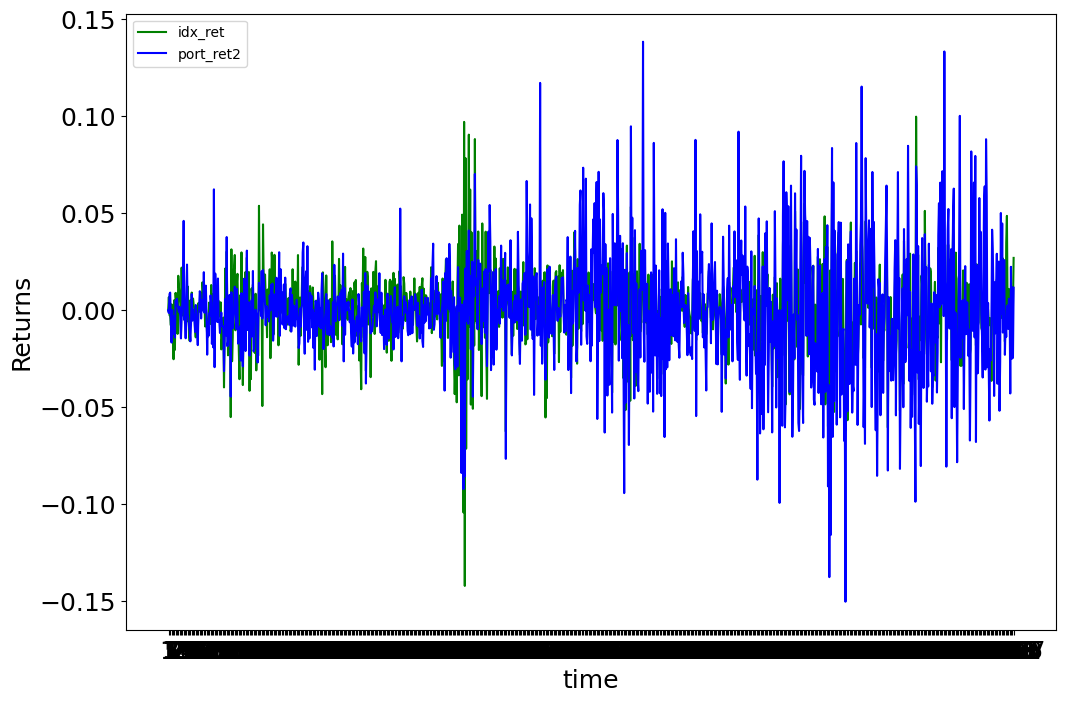

In [59]:
# Plot the returns of the index versus portfolio 2
plt.rcParams['figure.figsize'] = [12,8] 
plt.plot(range(0,numobs),idx_ret,color='green', label='idx_ret')
plt.plot(range(0,numobs),port_ret2,color='blue', label='port_ret2')
plt.xticks(range(1,numobs,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Returns",fontsize = 18)
plt.xlabel("time", fontsize = 18)
plt.legend()

# Short analysis report for BlockChain Portfolio

We rebuilt a blockchain ETF portfolio for BKCH from Global X to track the NTTR index, a NASDAQ high-tech index. The new portfolio is rebuilt with a large portfolio and a small portfolio. The large portfolio is 25 stocks same as with the original BKCH, and the small one consists of most 10 and less 5 communal stocks from BKCH.

The small portfolio tracks the NTTR index closely, while the large portfolio deviates more from the index in the late period. The reason may be that the large portfolio includes stocks that have significantly risen or fallen in the past some time, such as NVIDIA.

Furthermore, the results were changed little when we modified the parameter of the Autoencoder model.

## Limitation

These results show that the weights of each stock for both portfolios were all evenly divided rather than differentiated. We have tried to modify the parameter of both models, but nothing changed.